In [1]:
import wave
import numpy as np
import os
from matplotlib import pyplot as plt
from IPython.display import Audio
import librosa
import librosa.display

In [2]:
filepath = r"..\test_data"
#test_filename = "16-122828-0002.wav"
test_filename = "yamaha.wav"
testfile = os.path.join(filepath, test_filename)
Audio(testfile)

In [3]:
audio_data = wave.open(testfile)
audio_data.getparams()

_wave_params(nchannels=2, sampwidth=2, framerate=44100, nframes=58879, comptype='NONE', compname='not compressed')

In [4]:
frequency_sample = audio_data.getframerate()
number_of_channels = audio_data.getnchannels()
number_of_samples = audio_data.getnframes()
sample_width = audio_data.getsampwidth()

Disk space in byte

In [5]:
number_of_channels * (number_of_samples * 16)/8

235516.0

Data

In [6]:
x = audio_data.readframes(-1)
#x[0:1]
data = np.frombuffer(x, dtype="int16").reshape(-1, number_of_channels)
data.shape

(58879, 2)

Time series

In [7]:
duration = number_of_samples/frequency_sample
duration

1.335124716553288

In [8]:
sampled_time = np.arange(0, duration, 1/frequency_sample)

In [9]:
sampled_time.shape

(58879,)

Plot

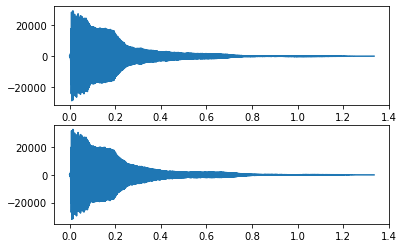

In [10]:
for i in range(number_of_channels):
    plt.subplot(2, 1, i+1)
    plt.plot(sampled_time,data[:,i])

using librosa package

In [36]:
lib_data, lib_sr = librosa.load(testfile, sr=None, mono=False)

In [37]:
lib_data

array([[-6.1035156e-05, -2.7465820e-04,  1.8310547e-04, ...,
        -9.1552734e-05,  9.1552734e-05, -6.1035156e-05],
       [-3.0517578e-04, -9.1552734e-05,  6.7138672e-04, ...,
        -6.1035156e-05,  0.0000000e+00, -9.1552734e-05]], dtype=float32)

In [22]:
data = data.T/((2**16)/2)
data

array([[-6.10351562e-05, -2.74658203e-04,  1.83105469e-04, ...,
        -9.15527344e-05,  9.15527344e-05, -6.10351562e-05],
       [-3.05175781e-04, -9.15527344e-05,  6.71386719e-04, ...,
        -6.10351562e-05,  0.00000000e+00, -9.15527344e-05]])

In [38]:
lib_sr

44100

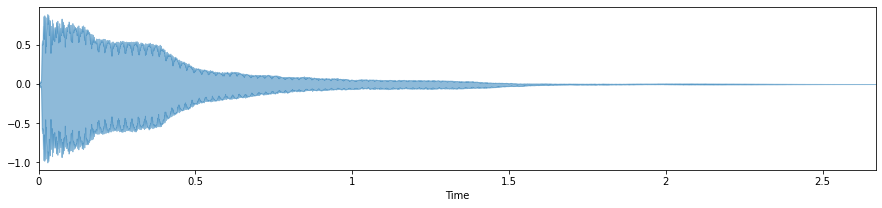

In [14]:
plt.figure(figsize=(15,3))
librosa.display.waveplot(lib_data, alpha=0.5)
plt.plot();

In [16]:
lib_data, lib_sr = librosa.load(testfile, mono=False)

In [17]:
lib_data

array([[-1.9272127e-04,  1.8120405e-05,  3.2698430e-05, ...,
         3.3179776e-06,  1.3411465e-05,  0.0000000e+00],
       [-3.4469392e-04,  5.9669674e-04,  7.7823293e-05, ...,
        -3.9566836e-05, -3.5162302e-05,  0.0000000e+00]], dtype=float32)

In [18]:
lib_sr

22050

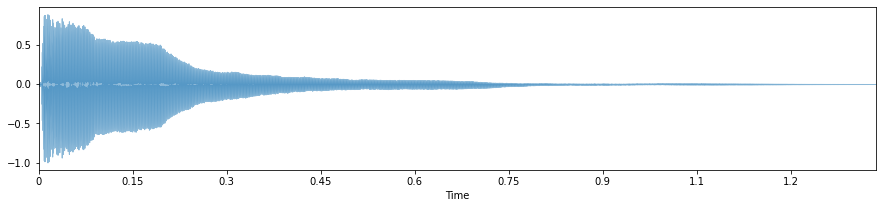

In [19]:
plt.figure(figsize=(15,3))
librosa.display.waveplot(lib_data, alpha=0.5)
plt.plot();